# Summary

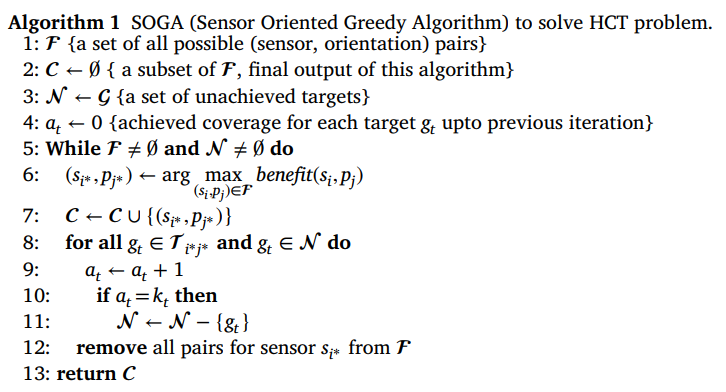

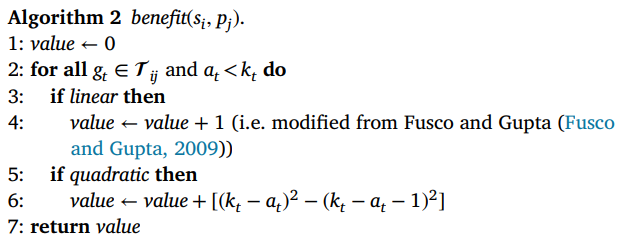

# Implementation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches as ptc
import tqdm


## Data

In [2]:
import pickle
with open("./fix_sensors.pkl", 'rb') as f:
  fs_data = pickle.load(f)

with open("./fix_targets.pkl", 'rb') as f:
  ft_data = pickle.load(f)

data = {
  'fixed-sensor': fs_data,
  'fixed-target': ft_data
}


In [3]:
fs_data[0]['large']

[{'m': 6,
  'n': 45,
  'q': 8,
  'K': [2, 2, 2, 2, 1, 3],
  'radius': 20,
  'targets': array([[301.26526076, 364.5937282 ],
         [598.3574843 , 217.89255425],
         [297.23780771, 988.03596616],
         [299.91911151, 454.0016212 ],
         [743.19319873, 688.27423578],
         [ 48.14283598, 140.55296758]]),
  'sensors': array([[ 79.40658464, 212.64437637],
         [731.49649034,  33.18935456],
         [187.4119441 , 303.94640124],
         [858.17705316, 653.16279053],
         [819.06351386, 938.30481845],
         [540.79375499, 871.20448226],
         [710.24279862, 766.06477654],
         [314.35011318, 788.44734325],
         [471.16789893, 664.98490348],
         [821.63689771, 260.28685757],
         [459.26519717, 907.19503071],
         [357.79826533, 670.73231191],
         [494.21244725, 560.44063098],
         [828.24925244, 110.98946921],
         [335.20804737, 447.05554381],
         [173.76159314, 460.3582712 ],
         [712.01402033, 864.56360952],
     

In [4]:
# def center_square(area):
#     x_ = area[0]
#     y_ = area[1]
#     x_range = x_[1] - x_[0]
#     y_range = y_[1] - y_[0]

#     x = (x_[0] + x_range*0.25, x_[0] + x_range*0.75)
#     y = (y_[0] + y_range*0.25, y_[0] + y_range*0.75)
#     return (x, y)

# def zipf(n, area):
#     n_in = int(0.75*n)
#     n_out = n - n_in

#     points_out = np.random.rand(2, n_out)

#     # map x and y values between minx - maxx, miny - maxy
#     points_out[0, :] = np.interp(points_out[0, :], [0, 1], area[0])
#     points_out[1, :] = np.interp(points_out[1, :], [0, 1], area[1])

#     area_in = center_square(area)
#     points_in = np.random.rand(2, n_in)

#     # map x and y values between minx - maxx, miny - maxy
#     points_in[0, :] = np.interp(points_in[0, :], [0, 1], area_in[0])
#     points_in[1, :] = np.interp(points_in[1, :], [0, 1], area_in[1])

#     points = np.concatenate((points_out, points_in), axis=1).T
#     indices = np.arange(n)
#     np.random.shuffle(indices)
#     return points[indices]

In [5]:
# def random_points(n_points, area, distribution_type='uniform'):
#   pt1, pt2 = area
#   if distribution_type == 'uniform':
#     # random values between 0 - 1
#     points = np.random.rand(2, n_points)

#     # map x and y values between minx - maxx, miny - maxy
#     points[0, :] = np.interp(points[0, :], [0, 1], area[0])
#     points[1, :] = np.interp(points[1, :], [0, 1], area[1])

#     return points.T

#   if distribution_type == 'zipf':
#     points = zipf(n_points, area)

#   return points

# def generate_data(distribution_type='uniform'):
#   sensing_radius = 20
#   # Fixed_sensors
#   fs_data = {'small': [], 'large': []}
#   # small
#   n = 30
#   area = ((0, 200), (0, 200))
#   sensors = random_points(n, area, distribution_type=distribution_type)
#   targets_all = random_points(120, area)
#   K_all = np.random.randint(low=1, high=4, size=120)
#   for i in range(3, 121):
#     targets = targets_all[:i]
#     K = list(K_all[:i])
#     fs_data['small'].append({'m' : i,
#           'n' : n,
#           'q' : 8,
#           'K' : list(map(int, K)),
#           'radius' : sensing_radius,
#           'targets' : targets,
#           'sensors': sensors,
#           'margin': ((-5, 205), (-5, 205))})

#   # large
#   n = 45
#   area = ((0, 1000), (0, 1000))
#   sensors = random_points(n, area, distribution_type=distribution_type)
#   targets_all = random_points(180, area)
#   K_all = np.random.randint(low=1, high=4, size=180)
#   for i in range(6, 181):
#     targets = targets_all[:i]
#     K = list(K_all[:i])
#     fs_data['large'].append({'m' : i,
#           'n' : n,
#           'q' : 8,
#           'K' : list(map(int, K)),
#           'radius' : sensing_radius,
#           'targets' : targets,
#           'sensors': sensors,
#           'margin': ((-5, 1005), (-5, 1005))})

#   # Fixed_targets
#   ft_data = {'small': [], 'large': []}
#   # small
#   m = 30
#   area = ((0, 200), (0, 200))
#   targets = random_points(m, area)
#   sensors_all = random_points(120, area, distribution_type=distribution_type)
#   K = list(np.random.randint(low=1, high=4, size=m))
#   for i in range(3, 121):
#     sensors = sensors_all[:i]
#     ft_data['small'].append({'m' : m,
#           'n' : i,
#           'q' : 8,
#           'K' : list(map(int, K)),
#           'radius' : sensing_radius,
#           'targets' : targets,
#           'sensors': sensors,
#           'margin': ((-5, 205), (-5, 205))})

#   # large
#   m = 45
#   area = ((0, 1000), (0, 1000))
#   targets = random_points(m, area)
#   sensors_all = random_points(180, area, distribution_type=distribution_type)
#   K = list(np.random.randint(low=1, high=4, size=m))
#   for i in range(6, 181):
#     sensors = sensors_all[:i]
#     ft_data['large'].append({'m' : m,
#           'n' : i,
#           'q' : 8,
#           'K' : list(map(int, K)),
#           'radius' : sensing_radius,
#           'targets' : targets,
#           'sensors': sensors,
#           'margin': ((-5, 1005), (-5, 1005))})

#   return {
#       'fixed-sensor': fs_data,
#       'fixed-target': ft_data,
#   }

In [6]:
# data = generate_data()

In [7]:
data['fixed-sensor'][0]['small']

[{'m': 3,
  'n': 30,
  'q': 8,
  'K': [2, 2, 2],
  'radius': 20,
  'targets': array([[ 19.67912994,  12.9707189 ],
         [132.06054394, 115.99675749],
         [152.87453244, 112.29691759]]),
  'sensors': array([[ 27.42194115, 168.17431589],
         [107.06202629,   7.68526979],
         [ 43.0403744 , 180.35239843],
         [  2.42415493,  92.29549292],
         [ 48.24029152, 127.44029536],
         [195.17475098, 131.87078444],
         [160.30742238, 179.02354814],
         [191.91532886, 127.33393643],
         [ 97.57080879, 122.78671695],
         [ 21.94723974,  13.33040811],
         [109.59189779, 103.68160439],
         [ 90.87546691,  30.03380016],
         [168.87141655, 147.48675374],
         [ 19.61651616, 102.44438416],
         [ 97.6482274 , 136.04555584],
         [ 30.00973294,   8.33458012],
         [ 64.93518538,  16.95840321],
         [147.47141548, 143.26467761],
         [ 95.20362587,  14.4168672 ],
         [ 75.17765703,  14.25134555],
         [ 78.

In [8]:
sample = data['fixed-sensor'][0]['small'][20]

## Utils

In [9]:
def make_pan_boundaries(centroid, q, radius):
    # first line always lies on x_axis
    ans = []
    theta = 2*np.pi/q
    for i in range(q):
        x = radius*np.cos(theta*i)
        y = radius*np.sin(theta*i)
        ans.append((centroid[0] + x, centroid[1] + y))

    return ans

In [10]:
def show_network(network, sensors_mask=None, figsize=None):
    if figsize is not None:
      plt.figure(figsize=(figsize, figsize))

    x_lim = network['margin'][0]
    y_lim = network['margin'][1]

    targets = network['targets']
    sensors = network['sensors']
    radius = network['radius']
    q = network['q']
    tar_x = [i[0] for i in targets]
    tar_y = [i[1] for i in targets]
    plt.plot(tar_x, tar_y, 'r^', label='targets')
    sen_x = [i[0] for i in sensors]
    sen_y = [i[1] for i in sensors]
    plt.plot(sen_x, sen_y, 'go', label='sensors')
    ax = plt.gca()

    for i in range(len(sensors)):
        sensor = sensors[i]
        active = True

        if sensors_mask is not None:
            active = False
            theta = 360.0/q
            pj = sensors_mask[i]
            if pj is not None:
              active = True
              theta1, theta2 = theta*pj, theta*(pj+1)
              wedge = ptc.Wedge(sensors[i], radius, theta1, theta2, color='#34e1eb', alpha=0.45)
              ax.add_artist(wedge)
        if active:
          # if sensors_mask is not None:
          #   plt.annotate(f's{i}', sensors[i], textcoords='offset points', xytext=(0, 5), ha='center')
          circle = plt.Circle(sensor, radius, color='m', fill=False, linewidth=1)
          ax.add_artist(circle)
          pan_boundaries = make_pan_boundaries(sensor, q, radius)
          for point in pan_boundaries:
              plt.plot([sensor[0], point[0]], [sensor[1], point[1]], 'b--', alpha=0.2)

    plt.xlim([x_lim[0], x_lim[1]])
    plt.ylim([y_lim[0], y_lim[1]])
    ax.set_aspect(1.0)  # make aspect ratio square

    plt.legend()

    plt.show()

In [11]:
def is_within_FoV(bisector, target, sensor, radius):
    target = np.asarray(target)
    sensor = np.asarray(sensor)
    bisector = np.asarray(bisector)
    v = target - sensor
    dist = np.linalg.norm(v)
    scalar = bisector.dot(v)
    return scalar + 1e-7 >= radius*dist*np.cos(np.pi/8) and dist - 1e-7 <= radius

def mask_T(m, n, q, radius, targets, sensors):
  T = np.zeros((n, q), dtype=list)
  for i in range(n):
    for j in range(q):
      T[i, j] = []

  bisectors = []
  for i in range(8):
    bisectors.append((radius*np.cos(np.pi/8+i*np.pi/4), radius*np.sin(np.pi/8+i*np.pi/4)))

  for i in range(m):
    for j in range(n):
      for k in range(q):
        if is_within_FoV(bisectors[k], targets[i], sensors[j], radius):
          T[j, k].append(i)

  return T


## Visualize sample

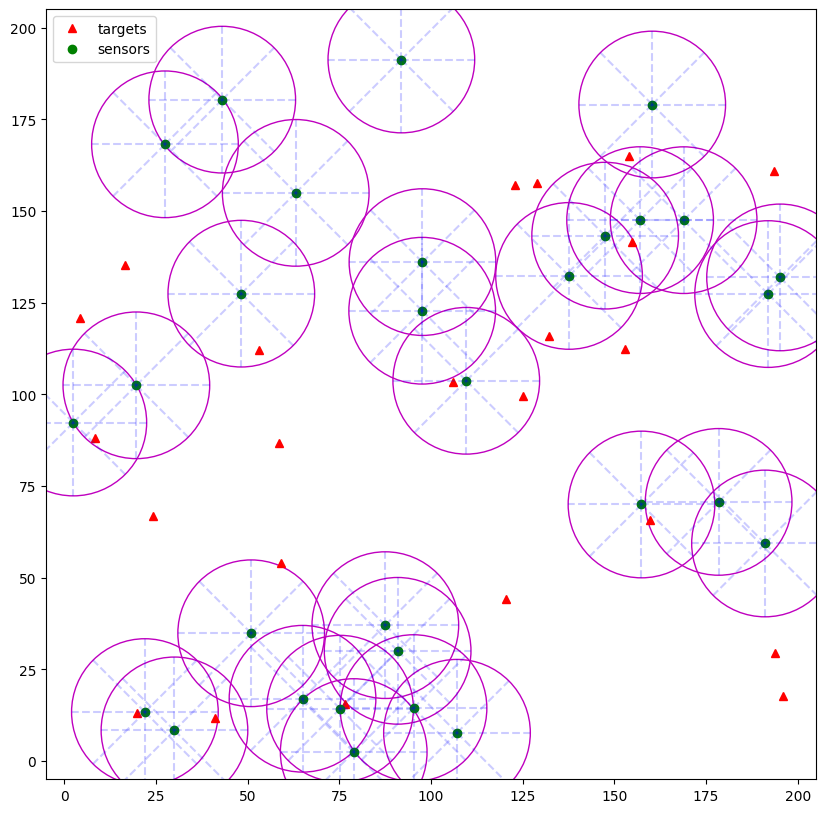

In [12]:
show_network(sample, figsize=10)

## Sensor Oriented Greedy Algorithm

In [13]:
def add_method(cls):
    def inner(func):
        setattr(cls, func.__name__, func)
    return inner

In [14]:
class SOGA:
  def __init__(self, n_targets, n_sensors, n_pans=8):
    self.n_targets = n_targets
    self.n_sensors = n_sensors
    self.n_pans = n_pans
    self.__build()

  def __build(self):
    self.F = [None]*self.n_sensors
    for i in range(self.n_sensors):
      self.F[i] = list(range(self.n_pans))

    self.N = set(range(self.n_targets))


Define 'solve' method

In [15]:
@add_method(SOGA)
def solve(self, K, T, mode="linear"):
  F = self.F.copy()
  N = self.N.copy()
  C = [None]*self.n_sensors
  a = np.zeros((self.n_targets,))

  while self.__continue(F, N, T):

    _, si, pj = self.__max_benefit(F=F, T=T, a=a, K=K, mode=mode)
    if si is None or pj is None:
      continue
    C[si] = pj
    for t in T[si, pj]:
      if t in N:
        a[t] += 1
        if a[t] == K[t]:
          N.remove(t)
    F[si] = None

  return C, a


Add required methods for 'solve'

In [16]:
@add_method(SOGA)
def __max_benefit(self, F, T, a, K, mode):
  si_ = None
  pj_ = None
  value_ = -1

  for i in range(len(F)):
    if F[i] == None:
      continue
    # print(F[i])
    for j in F[i]:
      value = 0
      flag = False
      for t in T[i, j]:
        if a[t] < K[t]:
          flag = True
          if mode == 'linear':
            value += 1
          elif mode == 'quadratic':
            value += ((K[t] - a[t])**2 - (K[t] - a[t] - 1)**2)
          elif mode == 'prioritize':
            value += K[t]*((K[t] - a[t])**2 - (K[t] - a[t] - 1)**2)
          elif mode == 'reduced_variance':
            count = 0
            group_achived_coverage = 0
            for t_i in range(len(K)):
              if K[t_i] == K[t]:
                count += 1
                group_achived_coverage += a[t_i]
            u, g = group_achived_coverage/count, count
            old = (K[t]-a[t])**2 + (a[t]-u)**2/g
            new = (K[t]-a[t]-1)**2 + (a[t]-u+1-1/g)**2/g
            value += old-new
      if flag and (value > value_):
        value_ = value
        si_ = i
        pj_ = j

  return value_, si_, pj_


In [17]:
@add_method(SOGA)
def __remain(self, F, N, T):
  for i in range(len(F)):
    if F[i] is not None:
      for j in F[i]:
        for t in T[i, j]:
          if t in N:
            return True
  return False

@add_method(SOGA)
def __continue(self, F, N, T):
  return (len(N) >= 0) and any(F) and self.__remain(F, N, T)


In [18]:
def solve_SOGA(network, mode='linear'):
  m = network['m']    # number of targets
  n = network['n']    # number of sensors
  q = network['q']    # number of pans
  targets = network['targets']
  sensors = network['sensors']
  radius = network['radius']
  K = np.asarray(network['K'])

  T = mask_T(m, n, q, radius, targets, sensors)

  model = SOGA(m, n, q)
  sensors_mask, achieved_coverage = model.solve(K, T, mode=mode)

  return achieved_coverage, sensors_mask


## Solve

In [19]:
achieved_coverage, sensors_mask = solve_SOGA(sample)

In [20]:
print("expected: ", sample['K'])
print("actual: ", achieved_coverage)

expected:  [2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 2, 2, 3, 1, 3, 2, 3, 2, 3, 2, 3]
actual:  [1. 0. 0. 1. 0. 0. 0. 0. 2. 0. 1. 1. 0. 0. 3. 0. 1. 2. 0. 2. 0. 0. 0.]


In [21]:
sensors_mask

[None,
 None,
 None,
 7,
 6,
 None,
 5,
 None,
 None,
 4,
 4,
 None,
 4,
 5,
 None,
 0,
 7,
 7,
 None,
 None,
 None,
 None,
 2,
 4,
 None,
 6,
 None,
 0,
 None,
 None]

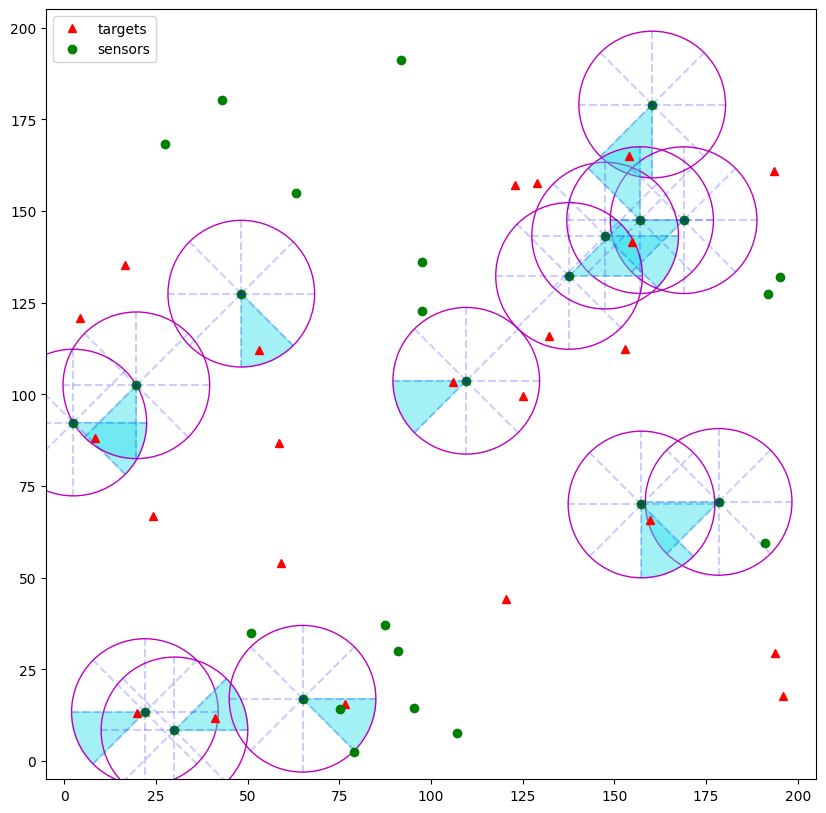

In [22]:
show_network(sample, sensors_mask, figsize=10)

# Metrics

## Distance index

In [23]:
def distance_index(k, x):
  k = np.asarray(k)
  x = np.asarray(x)

  a = np.sum(k*k)
  b = k - x
  b = np.sum(b*b)
  return (a-b)/a


## Variance

In [24]:
def variance(k, x):
  k = np.asarray(k)
  x = np.asarray(x)
  m = x.shape[0]
  mk = np.zeros_like(x)
  for t in range(m):
    mk[t] = np.sum(k == k[t])
  nu_k = np.zeros_like(x)
  for t in range(m):
    ans = 0
    for i in range(m):
      ans += x[i]*(k[i] == k[t])
    nu_k[t] = ans/mk[t]

  a = (x - nu_k)
  return np.sum(a*a/mk)

## Activated sensor

In [25]:
def activated_sensors(mask):
  cnt = 0
  for i in mask:
    if i is not None:
      cnt += 1

  return cnt

# Evaluate

## Fixed sensor

In [26]:
def coverage_quality(mask, network):
  sensors = network['sensors']
  targets = network['targets']
  radius = network['radius']
  n = network['n']
  m = network['m']
  q = network['q']
  T = np.zeros((n, q, m), dtype=bool)

  bisectors = []
  for i in range(q):
      bisectors.append((radius*np.cos(np.pi*(1 + i*2)/q), radius*np.sin(np.pi*(1 + i*2)/q)))

  for i in range(n):
      for j in range(m):
          for p in range(q):
              T[i, p, j] = is_within_FoV(bisectors[p], targets[j], sensors[i], radius)

  U = np.zeros((n, q, m), dtype=float)
  for i in range(n):
    for j in range(m):
        for p in range(q):
          if T[i, p, j]:
            target = np.asarray(targets[j])
            sensor = np.asarray(sensors[i])
            v = target - sensor
            U[i, p, j] = 1 - np.square(np.linalg.norm(v)/radius)

  S = np.zeros((n, q), dtype=bool)
  for i in range(n):
    if mask[i] is not None:
      S[i, mask[i]] = True

  return np.sum(np.sum(U, axis=2)*S)

### Distance index

In [27]:
DI_all = []
VAR_all = []
ACT_all = []
CQ_all = []
for i in range(10):
    DIs = []
    VARs = []
    ACTs = []
    CQs = []
    for dt in tqdm.tqdm(data['fixed-sensor'][i]['small']):
        achieved_coverage, mask = solve_SOGA(dt)
        DI_score = distance_index(np.asarray(dt['K']), achieved_coverage)
        DIs.append(DI_score)
        var_score = variance(np.asarray(dt['K']), achieved_coverage)
        VARs.append(var_score)
        act_score = activated_sensors(mask)
        ACTs.append(act_score)
        cq_score = coverage_quality(mask, dt)
        CQs.append(cq_score)

    DI_all.append(DIs)
    VAR_all.append(VARs)
    ACT_all.append(ACTs)
    CQ_all.append(CQs)

soga_fs_small = [DI_all, VAR_all, ACT_all, CQ_all]
import pickle
with open('soga_fs_small.pkl', 'wb') as f:
    pickle.dump(soga_fs_small, f)
    



100%|██████████| 118/118 [00:31<00:00,  3.70it/s]


### Variance

In [28]:
# VARs_fs_small = []
# for dt in tqdm.tqdm(small_fs):
#   achieved_coverage, _ = solve_SOGA(dt)
#   var_score = variance(np.asarray(dt['K']), achieved_coverage)
#   VARs_fs_small.append(var_score)

NameError: name 'small_fs' is not defined

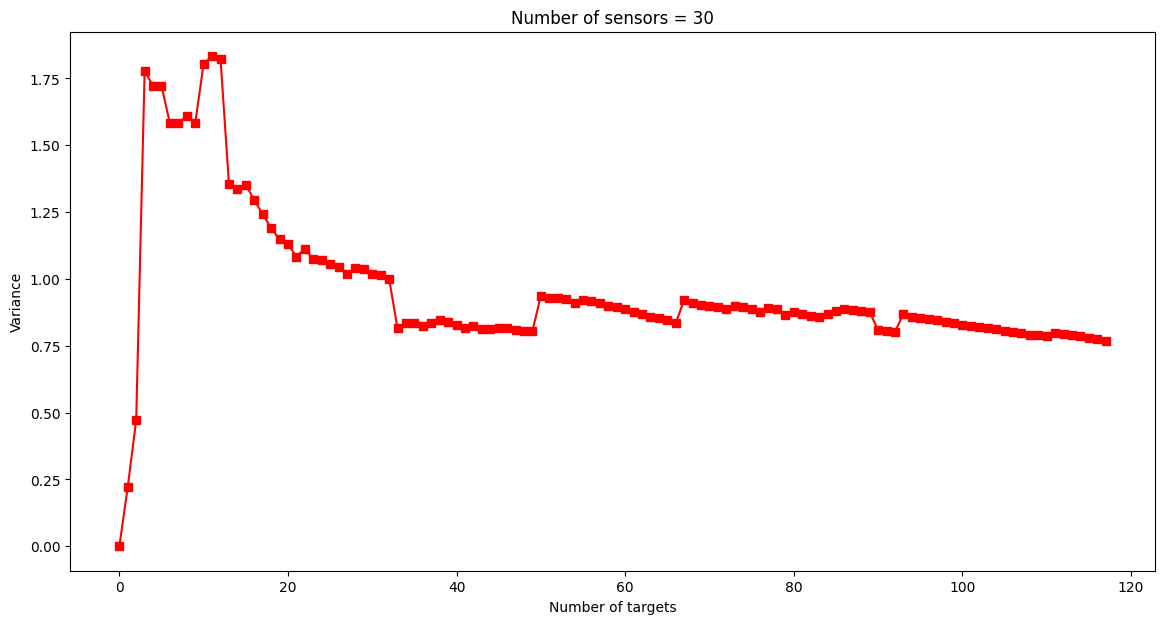

In [28]:
plt.figure(figsize=(14, 7))
x_axis = np.arange(len(small_fs))
plt.plot(x_axis, VARs_fs_small, 'r-')
plt.plot(x_axis, VARs_fs_small, 'rs')
plt.xlabel("Number of targets")
plt.ylabel("Variance")
plt.title(f'Number of sensors = {small_fs[0]["n"]}')
plt.show()

### Activated sensors

In [29]:
ACT_fs_small = []
for dt in tqdm.tqdm(small_fs):
  _, mask = solve_SOGA(dt)
  act_score = activated_sensors(mask)
  ACT_fs_small.append(act_score)

100%|██████████| 118/118 [00:10<00:00, 11.57it/s]


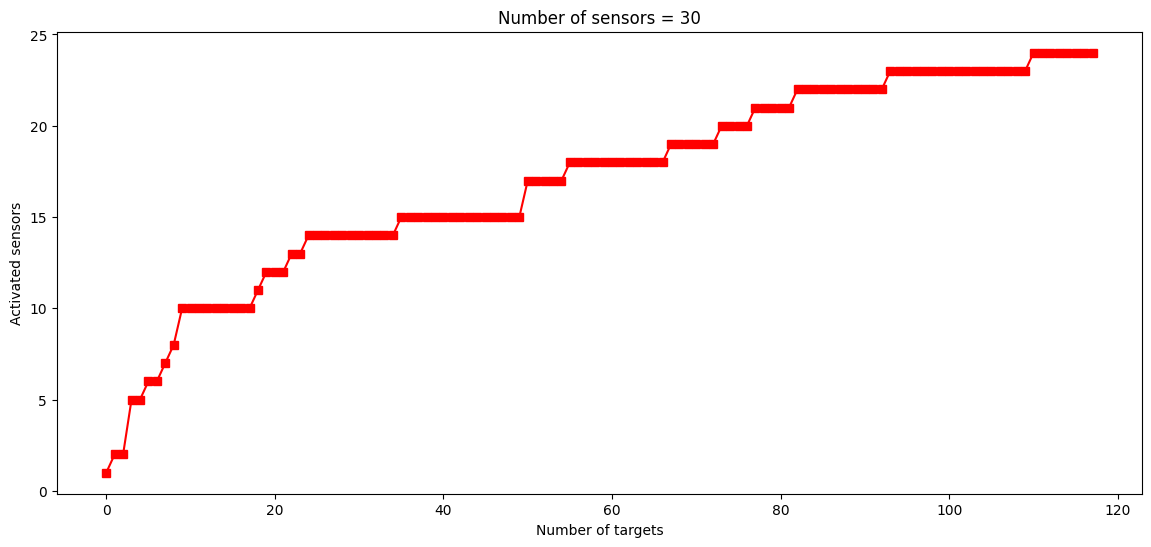

In [30]:
plt.figure(figsize=(14, 6))
x_axis = np.arange(len(small_fs))
plt.plot(x_axis, ACT_fs_small, 'r-')
plt.plot(x_axis, ACT_fs_small, 'rs')
plt.xlabel("Number of targets")
plt.ylabel("Activated sensors")
plt.title(f'Number of sensors = {small_fs[0]["n"]}')
plt.show()

## Fixed target

In [31]:
small_ft = eval_data['fixed-target']['small']


### Distance index

In [32]:
DIs_ft_small = []
for dt in tqdm.tqdm(small_ft):
  achieved_coverage, _ = solve_SOGA(dt)
  DI_score = distance_index(np.asarray(dt['K']), achieved_coverage)
  DIs_ft_small.append(DI_score)


100%|██████████| 118/118 [00:10<00:00, 11.26it/s]


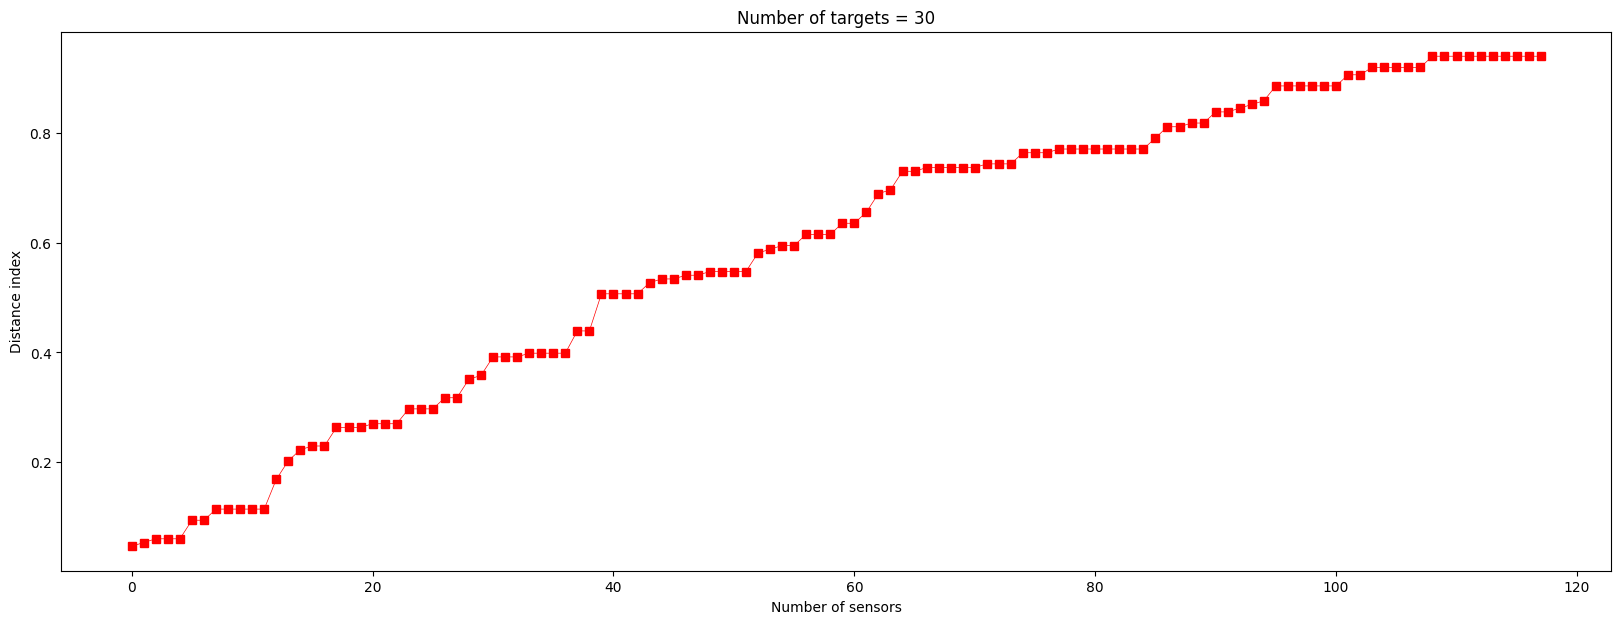

In [33]:
plt.figure(figsize=(20, 7))
x_axis = np.arange(len(small_ft))
plt.plot(x_axis, DIs_ft_small, 'r-', linewidth=0.5)
plt.plot(x_axis, DIs_ft_small, 'rs')
plt.xlabel("Number of sensors")
plt.ylabel("Distance index")
plt.title(f'Number of targets = {small_ft[0]["m"]}')
plt.show()

### Variance

In [34]:
VARs_ft_small = []
for dt in tqdm.tqdm(small_ft):
  achieved_coverage, _ = solve_SOGA(dt)
  var_score = variance(np.asarray(dt['K']), achieved_coverage)
  VARs_ft_small.append(var_score)

100%|██████████| 118/118 [00:10<00:00, 11.68it/s]


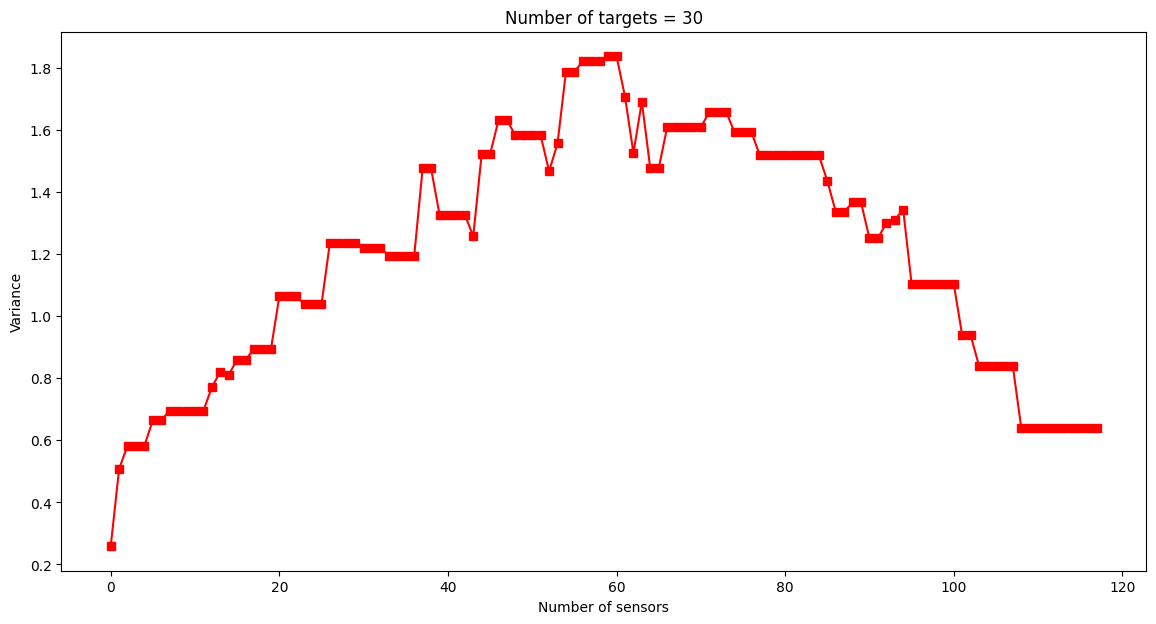

In [35]:
plt.figure(figsize=(14, 7))
x_axis = np.arange(len(small_ft))
plt.plot(x_axis, VARs_ft_small, 'r-')
plt.plot(x_axis, VARs_ft_small, 'rs')
plt.xlabel("Number of sensors")
plt.ylabel("Variance")
plt.title(f'Number of targets = {small_ft[0]["m"]}')
plt.show()

### Activated sensors

In [36]:
ACT_ft_small = []
for dt in tqdm.tqdm(small_ft):
  _, mask = solve_SOGA(dt)
  act_score = activated_sensors(mask)
  ACT_ft_small.append(act_score)

100%|██████████| 118/118 [00:10<00:00, 11.44it/s]


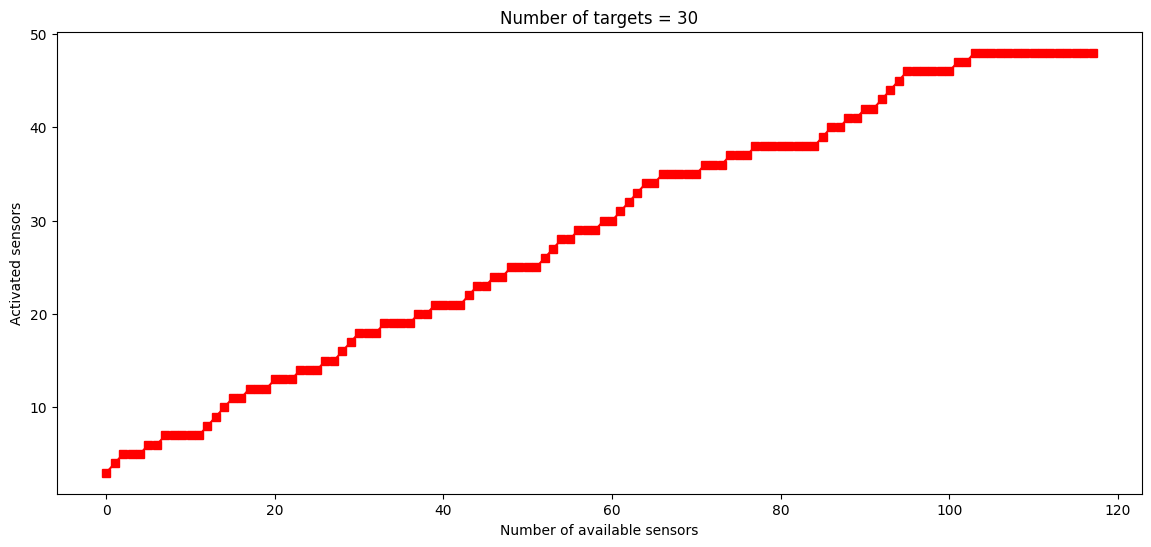

In [37]:
plt.figure(figsize=(14, 6))
x_axis = np.arange(len(small_ft))
plt.plot(x_axis, ACT_ft_small, 'r-')
plt.plot(x_axis, ACT_ft_small, 'rs')
plt.xlabel("Number of available sensors")
plt.ylabel("Activated sensors")
plt.title(f'Number of targets = {small_ft[0]["m"]}')
plt.show()

In [38]:
import pandas as pd

In [39]:
di_fs = pd.read_csv('./Distance_Index_fs.csv')

In [40]:
di_fs

,Unnamed: 0,ILP,IQP,PIQP
0,0,0.493223,0.493223,0.420725
1,1,0.538336,0.538336,0.550206
2,2,0.441903,0.441903,0.461196
3,3,0.401015,0.401015,0.414048
4,4,0.430413,0.430413,0.436713
...,...,...,...,...
113,113,0.213872,0.246035,0.251160
114,114,0.213866,0.245627,0.249440
115,115,0.213070,0.245377,0.248694
116,116,0.212943,0.245077,0.249278


In [41]:
plt.figure(figsize=(16, 7))
x_axis = np.arange(len(DI_fs_avg))
plt.plot(x_axis, DI_fs_avg, 'r-', linewidth=1.0)
plt.plot(x_axis, DI_fs_avg, 'rs', markersize=4.5, label='GA')

plt.plot(x_axis, di_fs['ILP'], 'g-', linewidth=1.0)
plt.plot(x_axis, di_fs['ILP'], 'go', markersize=4.5, label='ILP')

plt.plot(x_axis, di_fs['IQP'], 'b-', linewidth=1.0)
plt.plot(x_axis, di_fs['IQP'], 'b^', markersize=4.5, label='IQP')

plt.plot(x_axis, di_fs['PIQP'], 'm-', linewidth=1.0)
plt.plot(x_axis, di_fs['PIQP'], 'm*', markersize=4.5, label='PIQP')

plt.xlabel("Number of targets")
plt.ylabel("Distance index")
plt.legend()
plt.show()

NameError: name 'DI_fs_avg' is not defined

<Figure size 1600x700 with 0 Axes>